# Loading data

In [72]:
#loading package
import pandas as pd

import matplotlib.cm
from matplotlib import colors
import matplotlib.pyplot as plt 
import numpy as np              
import sklearn.cluster as sklc  # For clustering
import sklearn.metrics as sklm  # For the silhouette score

from sklearn.preprocessing import RobustScaler
import sklearn

In [73]:
df = pd.read_csv('London_imd_2019_cleaning.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4835 entries, 0 to 4834
Data columns (total 14 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   11code                                     4835 non-null   object 
 1   11name                                     4835 non-null   object 
 2   19code                                     4835 non-null   object 
 3   19name                                     4835 non-null   object 
 4   london_imd_rank                            4835 non-null   int64  
 5   london_imd_decile                          4835 non-null   int64  
 6   Index of Multiple Deprivation (IMD) Score  4835 non-null   float64
 7   Income Score (rate)                        4835 non-null   float64
 8   Employment Score (rate)                    4835 non-null   float64
 9   Education, Skills and Training Score       4835 non-null   float64
 10  Health Deprivation and D

,11code,11name,19code,19name,london_imd_rank,london_imd_decile,Index of Multiple Deprivation (IMD) Score,Income Score (rate),Employment Score (rate),"Education, Skills and Training Score",Health Deprivation and Disability Score,Crime Score,Barriers to Housing and Services Score,Living Environment Score
0,E01000001,City of London,E09000001,City of London,4576,10,6.208,0.007,0.010,0.024,-1.654,-2.012,29.472,31.873
1,E01000002,City of London,E09000001,City of London,4700,10,5.143,0.034,0.027,0.063,-1.115,-2.343,24.412,23.084
2,E01000003,City of London,E09000001,City of London,2562,6,19.402,0.086,0.086,5.804,-0.102,-1.032,40.103,40.535
3,E01000005,City of London,E09000001,City of London,1325,3,28.652,0.211,0.136,22.260,-0.121,-1.317,39.900,28.979
4,E01000006,Barking and Dagenham,E09000002,Barking and Dagenham,2485,6,19.837,0.117,0.059,14.798,-0.359,-0.147,45.171,26.888


In [74]:
# rename
df.rename(columns = {'Index of Multiple Deprivation (IMD) Score':'imd',
                     'Income Score (rate)':'income',
                     'Employment Score (rate)':'employment',
                     'Education, Skills and Training Score':'edu_ski_tra',
                     'Health Deprivation and Disability Score':'health_depri',
                     'Crime Score':'crime',
                     'Barriers to Housing and Services Score':'hous_serv',
                     'Living Environment Score':'living_env'}, 
          inplace = True)
df.head()

,11code,11name,19code,19name,london_imd_rank,london_imd_decile,imd,income,employment,edu_ski_tra,health_depri,crime,hous_serv,living_env
0,E01000001,City of London,E09000001,City of London,4576,10,6.208,0.007,0.010,0.024,-1.654,-2.012,29.472,31.873
1,E01000002,City of London,E09000001,City of London,4700,10,5.143,0.034,0.027,0.063,-1.115,-2.343,24.412,23.084
2,E01000003,City of London,E09000001,City of London,2562,6,19.402,0.086,0.086,5.804,-0.102,-1.032,40.103,40.535
3,E01000005,City of London,E09000001,City of London,1325,3,28.652,0.211,0.136,22.260,-0.121,-1.317,39.900,28.979
4,E01000006,Barking and Dagenham,E09000002,Barking and Dagenham,2485,6,19.837,0.117,0.059,14.798,-0.359,-0.147,45.171,26.888


# Clustering

In [75]:
data=df[["income","employment","edu_ski_tra","health_depri","crime","hous_serv","living_env"]]
print(data)

      income  employment  edu_ski_tra  health_depri  crime  hous_serv  \
0      0.007       0.010        0.024        -1.654 -2.012     29.472   
1      0.034       0.027        0.063        -1.115 -2.343     24.412   
2      0.086       0.086        5.804        -0.102 -1.032     40.103   
3      0.211       0.136       22.260        -0.121 -1.317     39.900   
4      0.117       0.059       14.798        -0.359 -0.147     45.171   
...      ...         ...          ...           ...    ...        ...   
4830   0.078       0.040        7.808        -0.394 -0.190     40.546   
4831   0.133       0.061        9.232        -0.196  0.214     50.293   
4832   0.184       0.119       17.868         0.879  0.365     37.315   
4833   0.154       0.095        9.758        -0.201 -0.276     45.060   
4834   0.145       0.085        6.379        -0.406  0.679     23.996   

      living_env  
0         31.873  
1         23.084  
2         40.535  
3         28.979  
4         26.888  
...      

In [76]:
# Standardisation
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

data_standardised = data.copy()
for c in data.columns.values:
    data_standardised[c] = mms.fit_transform(data[c].values.reshape(-1,1))
data_standardised.head()

,income,employment,edu_ski_tra,health_depri,crime,hous_serv,living_env
0,0.002320,0.022293,0.000187,0.326228,0.072289,0.355050,0.306702
1,0.064965,0.076433,0.000848,0.438871,0.002325,0.275423,0.204685
2,0.185615,0.264331,0.098214,0.650575,0.279434,0.522346,0.407245
3,0.475638,0.423567,0.377304,0.646604,0.219193,0.519151,0.273110
4,0.257541,0.178344,0.250750,0.596865,0.466498,0.602099,0.248839


In [77]:
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn import metrics
scores=[]#silhoutte Score
intra_sum_of_square_list = [] #elbow

max_cluster = 20
clusters = range(2,max_cluster)
X = data_standardised

for k in clusters:
    km = KMeans(n_clusters=k)
    labels=km.fit(X).labels_
    score=metrics.silhouette_score(X,labels)
    scores.append(score) #silhoutte Score
    intra_sum_of_square_list.append(km.inertia_) #elbow

print(clusters)

range(2, 20)


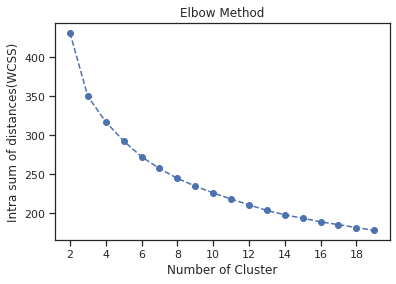

In [78]:
#Elbow
from matplotlib.pyplot import MultipleLocator
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_title("Elbow Method")
ax.set_xlabel("Number of Cluster")
ax.set_ylabel("Intra sum of distances(WCSS)")
plt.plot(clusters,intra_sum_of_square_list,marker = 'o', linestyle = '--')


x_major_locator = MultipleLocator(2)
ax = plt.gca()
ax.xaxis.set_major_locator(x_major_locator)

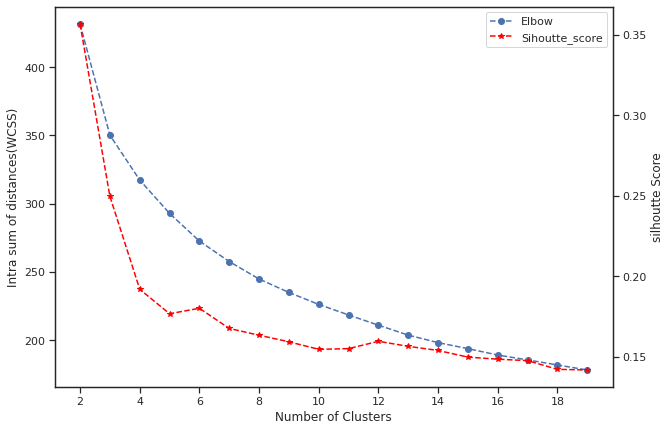

In [79]:
# combine two indicators together!
fig, ax1 = plt.subplots(figsize=(10,7))

ax2 = ax1.twinx()

Elbow, =ax1.plot(clusters,intra_sum_of_square_list, label="Elbow", marker = 'o', linestyle = '--')
Sihoutte_score, =ax2.plot(clusters, scores,label="Sihoutte_score", color='red', marker = '*', linestyle = '--')

ax1.set_xlabel("Number of Clusters")
ax1.set_ylabel("Intra sum of distances(WCSS)")
ax2.set_ylabel('silhoutte Score')

x_major_locator = MultipleLocator(2)
ax1 = plt.gca()
ax1.xaxis.set_major_locator(x_major_locator)


#legend
legend = ax1.legend(handles=[Elbow,Sihoutte_score], loc='upper right')

In [80]:
# 3 clusters
num_clusters = 3
random_state_seed = 100
kmeans_output = sklc.KMeans(n_clusters=num_clusters, random_state=random_state_seed).fit(data_standardised)

print(kmeans_output) 

clustering_ids_kmeans = kmeans_output.labels_

print(clustering_ids_kmeans)

# combine the clustering IDs to the dataframe
data3 = df.assign(cluster_id = clustering_ids_kmeans)

#lable for map
cluster_class={0:'1',1:'2',2:'3'}
cluster_class

data3['cluster_names'] = data3['cluster_id'].map(cluster_class)
data3

#Have a look at the result:
print(data3)

KMeans(n_clusters=3, random_state=100)
[2 2 0 ... 1 0 0]
         11code                11name     19code                19name  \
0     E01000001        City of London  E09000001        City of London   
1     E01000002        City of London  E09000001        City of London   
2     E01000003        City of London  E09000001        City of London   
3     E01000005        City of London  E09000001        City of London   
4     E01000006  Barking and Dagenham  E09000002  Barking and Dagenham   
...         ...                   ...        ...                   ...   
4830  E01033742             Greenwich  E09000011             Greenwich   
4831  E01033743             Greenwich  E09000011             Greenwich   
4832  E01033744             Greenwich  E09000011             Greenwich   
4833  E01033745             Greenwich  E09000011             Greenwich   
4834  E01033746             Greenwich  E09000011             Greenwich   

      london_imd_rank  london_imd_decile     imd  inco

# Map Clusters

In [81]:
df2 = data3

In [82]:
df2.head(1)

,11code,11name,19code,19name,london_imd_rank,london_imd_decile,imd,income,employment,edu_ski_tra,health_depri,crime,hous_serv,living_env,cluster_id,cluster_names
0,E01000001,City of London,E09000001,City of London,4576,10,6.208,0.007,0.01,0.024,-1.654,-2.012,29.472,31.873,2,3


In [83]:
import geopandas as gpd
lsoa = gpd.read_file('./LSOA/LSOA_2011_London_gen_MHW.shp')

In [84]:
lsoa.head(5)

,LSOA11CD,LSOA11NM,MSOA11CD,MSOA11NM,LAD11CD,LAD11NM,RGN11CD,RGN11NM,USUALRES,HHOLDRES,COMESTRES,POPDEN,HHOLDS,AVHHOLDSZ,geometry
0,E01000001,City of London 001A,E02000001,City of London 001,E09000001,City of London,E12000007,London,1465,1465,0,112.9,876,1.7,"POLYGON ((532105.092 182011.230, 532162.491 18..."
1,E01000002,City of London 001B,E02000001,City of London 001,E09000001,City of London,E12000007,London,1436,1436,0,62.9,830,1.7,"POLYGON ((532746.813 181786.891, 532671.688 18..."
2,E01000003,City of London 001C,E02000001,City of London 001,E09000001,City of London,E12000007,London,1346,1250,96,227.7,817,1.5,"POLYGON ((532135.145 182198.119, 532158.250 18..."
3,E01000005,City of London 001E,E02000001,City of London 001,E09000001,City of London,E12000007,London,985,985,0,52.0,467,2.1,"POLYGON ((533807.946 180767.770, 533649.063 18..."
4,E01000006,Barking and Dagenham 016A,E02000017,Barking and Dagenham 016,E09000002,Barking and Dagenham,E12000007,London,1703,1699,4,116.2,543,3.1,"POLYGON ((545122.049 184314.931, 545271.917 18..."


In [99]:
joined = lsoa.merge(df2,left_on = 'LSOA11CD', right_on ='11code')
joined.head(1)

,LSOA11CD,LSOA11NM,MSOA11CD,MSOA11NM,LAD11CD,LAD11NM,RGN11CD,RGN11NM,USUALRES,HHOLDRES,...,imd,income,employment,edu_ski_tra,health_depri,crime,hous_serv,living_env,cluster_id,cluster_names
0,E01000001,City of London 001A,E02000001,City of London 001,E09000001,City of London,E12000007,London,1465,1465,...,6.208,0.007,0.01,0.024,-1.654,-2.012,29.472,31.873,2,3


In [86]:
joined.head()

,LSOA11CD,LSOA11NM,MSOA11CD,MSOA11NM,LAD11CD,LAD11NM,RGN11CD,RGN11NM,USUALRES,HHOLDRES,...,imd,income,employment,edu_ski_tra,health_depri,crime,hous_serv,living_env,cluster_id,cluster_names
0,E01000001,City of London 001A,E02000001,City of London 001,E09000001,City of London,E12000007,London,1465,1465,...,6.208,0.007,0.010,0.024,-1.654,-2.012,29.472,31.873,2,3
1,E01000002,City of London 001B,E02000001,City of London 001,E09000001,City of London,E12000007,London,1436,1436,...,5.143,0.034,0.027,0.063,-1.115,-2.343,24.412,23.084,2,3
2,E01000003,City of London 001C,E02000001,City of London 001,E09000001,City of London,E12000007,London,1346,1250,...,19.402,0.086,0.086,5.804,-0.102,-1.032,40.103,40.535,0,1
3,E01000005,City of London 001E,E02000001,City of London 001,E09000001,City of London,E12000007,London,985,985,...,28.652,0.211,0.136,22.260,-0.121,-1.317,39.900,28.979,1,2
4,E01000006,Barking and Dagenham 016A,E02000017,Barking and Dagenham 016,E09000002,Barking and Dagenham,E12000007,London,1703,1699,...,19.837,0.117,0.059,14.798,-0.359,-0.147,45.171,26.888,0,1


In [121]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import geopandas
from shapely import geometry

<AxesSubplot:>

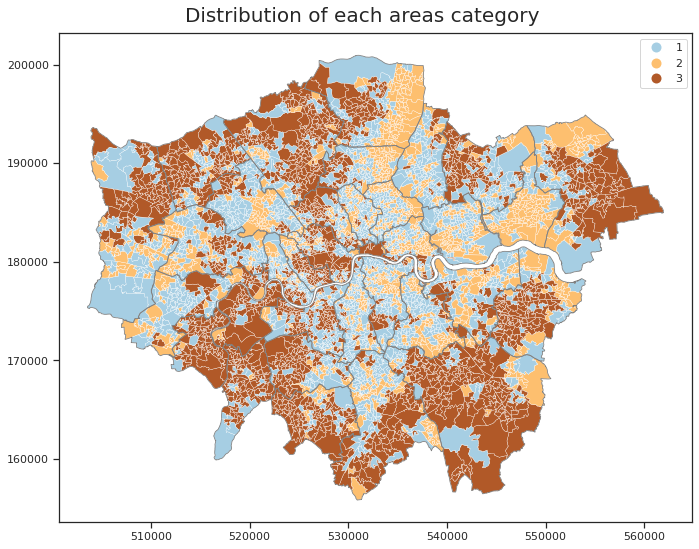

In [122]:


Borough = gpd.read_file("https://github.com/jreades/fsds/blob/master/data/src/Boroughs.gpkg?raw=true")

fig, ax = plt.subplots(1,1, figsize=(15,9))
fig.suptitle(f"Distribution of each areas category", fontsize=20, y=0.92)
joined.plot(ax=ax, column='cluster_names',legend=True, cmap='Paired', edgecolor="white", linewidth=.3)
Borough.to_crs(epsg=27700).plot(ax=ax, facecolor='none', edgecolor="grey",linewidth=0.8)

In [89]:
df3=df2[['income', 'employment', 'edu_ski_tra', 'health_depri', 'crime', 'hous_serv', 'living_env', 'cluster_names']]

# descriptive analysis of each cluster

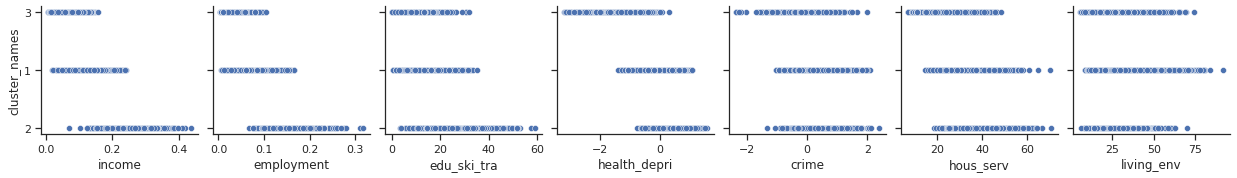

In [90]:
import seaborn as sns
sns.pairplot(df3, y_vars='cluster_names')

In [91]:
joined = pd.read_csv('./cluster/joined.csv')
joined.info()

cluster_class={0:'1',1:'2',2:'3'}
cluster_class

joined['cluster_names'] = joined['cluster_id'].map(cluster_class)
joined

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4268 entries, 0 to 4267
Data columns (total 38 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0.1       4268 non-null   int64  
 1   LSOA11CD           4268 non-null   object 
 2   LSOA11NM           4268 non-null   object 
 3   MSOA11CD           4268 non-null   object 
 4   MSOA11NM           4268 non-null   object 
 5   LAD11CD            4268 non-null   object 
 6   LAD11NM            4268 non-null   object 
 7   RGN11CD            4268 non-null   object 
 8   RGN11NM            4268 non-null   object 
 9   USUALRES           4268 non-null   int64  
 10  HHOLDRES           4268 non-null   int64  
 11  COMESTRES          4268 non-null   int64  
 12  POPDEN             4268 non-null   float64
 13  HHOLDS             4268 non-null   int64  
 14  AVHHOLDSZ          4268 non-null   float64
 15  area               4268 non-null   float64
 16  summary            4268 

,Unnamed: 0.1,LSOA11CD,LSOA11NM,MSOA11CD,MSOA11NM,LAD11CD,LAD11NM,RGN11CD,RGN11NM,USUALRES,...,imd,income,employment,edu_ski_tra,health_depri,crime,hous_serv,living_env,cluster_id,cluster_names
0,0,E01000001,City of London 001A,E02000001,City of London 001,E09000001,City of London,E12000007,London,1465,...,6.208,0.007,0.010,0.024,-1.654,-2.012,29.472,31.873,2,3
1,1,E01000002,City of London 001B,E02000001,City of London 001,E09000001,City of London,E12000007,London,1436,...,5.143,0.034,0.027,0.063,-1.115,-2.343,24.412,23.084,2,3
2,2,E01000003,City of London 001C,E02000001,City of London 001,E09000001,City of London,E12000007,London,1346,...,19.402,0.086,0.086,5.804,-0.102,-1.032,40.103,40.535,0,1
3,3,E01000005,City of London 001E,E02000001,City of London 001,E09000001,City of London,E12000007,London,985,...,28.652,0.211,0.136,22.260,-0.121,-1.317,39.900,28.979,1,2
4,4,E01000006,Barking and Dagenham 016A,E02000017,Barking and Dagenham 016,E09000002,Barking and Dagenham,E12000007,London,1703,...,19.837,0.117,0.059,14.798,-0.359,-0.147,45.171,26.888,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4263,4830,E01033742,Greenwich 007F,E02000319,Greenwich 007,E09000011,Greenwich,E12000007,London,1352,...,13.105,0.078,0.040,7.808,-0.394,-0.190,40.546,12.514,2,3
4264,4831,E01033743,Greenwich 002H,E02000314,Greenwich 002,E09000011,Greenwich,E12000007,London,2038,...,20.968,0.133,0.061,9.232,-0.196,0.214,50.293,11.922,0,1
4265,4832,E01033744,Greenwich 007G,E02000319,Greenwich 007,E09000011,Greenwich,E12000007,London,1845,...,29.363,0.184,0.119,17.868,0.879,0.365,37.315,14.174,1,2
4266,4833,E01033745,Greenwich 002I,E02000314,Greenwich 002,E09000011,Greenwich,E12000007,London,1820,...,22.101,0.154,0.095,9.758,-0.201,-0.276,45.060,14.836,0,1


In [92]:

clu0 = joined[joined['cluster_id']==0]
clu0.info()

clu1 = joined[joined['cluster_id']==1]
clu1.info()

clu2 = joined[joined['cluster_id']==2]
clu2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1720 entries, 2 to 4267
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0.1       1720 non-null   int64  
 1   LSOA11CD           1720 non-null   object 
 2   LSOA11NM           1720 non-null   object 
 3   MSOA11CD           1720 non-null   object 
 4   MSOA11NM           1720 non-null   object 
 5   LAD11CD            1720 non-null   object 
 6   LAD11NM            1720 non-null   object 
 7   RGN11CD            1720 non-null   object 
 8   RGN11NM            1720 non-null   object 
 9   USUALRES           1720 non-null   int64  
 10  HHOLDRES           1720 non-null   int64  
 11  COMESTRES          1720 non-null   int64  
 12  POPDEN             1720 non-null   float64
 13  HHOLDS             1720 non-null   int64  
 14  AVHHOLDSZ          1720 non-null   float64
 15  area               1720 non-null   float64
 16  summary            1720 

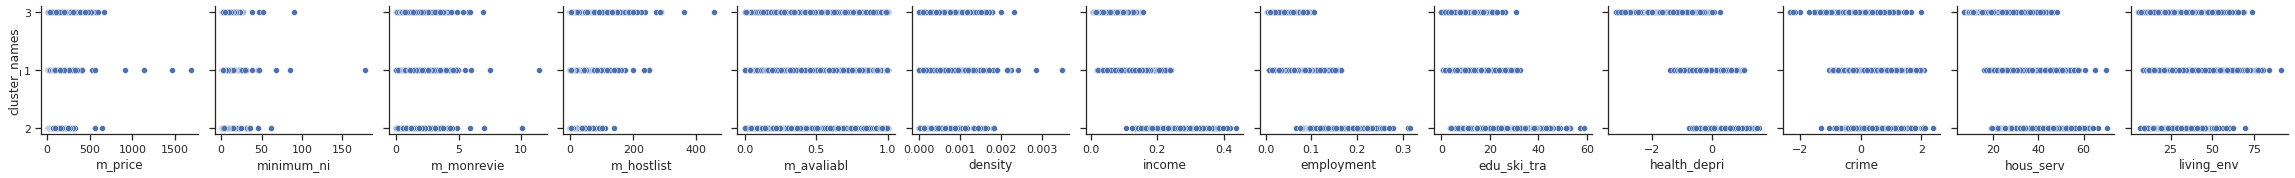

In [93]:
joined_desc = joined[['m_price','minimum_ni','m_monrevie','m_hostlist','m_avaliabl','density',
                      'income','employment','edu_ski_tra','health_depri','crime','hous_serv','living_env','cluster_names']]

import seaborn as sns
sns.pairplot(joined_desc, y_vars='cluster_names')

In [94]:
clu0_desc = clu0[['m_price','minimum_ni','m_monrevie','m_hostlist','m_avaliabl','density',
                      'income','employment','edu_ski_tra','health_depri','crime','hous_serv','living_env']]
clu0_desc.describe()

,m_price,minimum_ni,m_monrevie,m_hostlist,m_avaliabl,density,income,employment,edu_ski_tra,health_depri,crime,hous_serv,living_env
count,1720.000000,1720.000000,1720.000000,1720.000000,1720.000000,1.720000e+03,1720.000000,1720.000000,1720.000000,1720.000000,1720.000000,1720.000000,1720.000000
mean,88.230048,4.103087,1.117683,13.293700,0.332110,1.837373e-04,0.136011,0.084933,10.929760,-0.191048,0.427517,33.356260,34.218533
std,77.347724,6.441338,0.747258,25.240672,0.184273,2.926709e-04,0.034197,0.022880,5.679355,0.393877,0.467200,7.981865,10.869823
min,15.000000,1.000000,0.020000,1.000000,0.000000,6.978778e-08,0.018000,0.006000,0.492000,-1.401000,-1.041000,15.758000,8.485000
25%,54.271978,2.100000,0.689006,1.476343,0.207306,2.172064e-05,0.112000,0.069000,6.614750,-0.465500,0.125750,27.326750,26.906500
50%,76.238636,2.890390,1.000000,2.684211,0.301058,7.315987e-05,0.134000,0.083000,10.438000,-0.188500,0.411500,32.070000,33.110000
75%,104.829592,4.238354,1.374788,12.168367,0.421575,2.326385e-04,0.160000,0.101000,14.677750,0.065000,0.729000,38.418000,40.180500
max,1683.666667,178.500000,11.470000,251.000000,1.000000,3.475090e-03,0.240000,0.166000,32.243000,1.082000,2.099000,69.884000,91.602000


In [95]:
clu1_desc = clu1[['m_price','minimum_ni','m_monrevie','m_hostlist','m_avaliabl','density',
                      'income','employment','edu_ski_tra','health_depri','crime','hous_serv','living_env']]
clu1_desc.describe()

,m_price,minimum_ni,m_monrevie,m_hostlist,m_avaliabl,density,income,employment,edu_ski_tra,health_depri,crime,hous_serv,living_env
count,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000,1.148000e+03,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000
mean,71.082712,3.541839,1.151515,7.655209,0.362475,1.457248e-04,0.234248,0.146563,23.971673,0.289670,0.611456,38.629693,29.301877
std,42.723507,4.001523,0.788607,14.192183,0.206425,2.250194e-04,0.045982,0.033569,8.335426,0.380712,0.466481,8.052639,8.616565
min,14.000000,1.000000,0.010000,1.000000,0.000000,3.990270e-07,0.104000,0.066000,3.484000,-0.766000,-1.317000,18.763000,6.376000
25%,45.588889,1.897222,0.650000,1.333333,0.222231,1.670932e-05,0.201000,0.123000,18.073750,0.024750,0.312500,32.598500,23.446500
50%,64.000000,2.625000,1.006905,2.000000,0.326907,5.233749e-05,0.229500,0.143000,22.842500,0.294500,0.605000,38.492000,29.171000
75%,85.557193,3.809159,1.463393,6.333333,0.471005,1.912843e-04,0.264000,0.166250,28.879500,0.552500,0.902250,44.372250,34.453750
max,650.000000,61.200000,10.100000,137.545455,1.000000,1.819540e-03,0.437000,0.317000,58.976000,1.570000,2.377000,70.456000,69.793000


In [96]:
clu2_desc = clu2[['m_price','minimum_ni','m_monrevie','m_hostlist','m_avaliabl','density',
                      'income','employment','edu_ski_tra','health_depri','crime','hous_serv','living_env']]
clu2_desc.describe()

,m_price,minimum_ni,m_monrevie,m_hostlist,m_avaliabl,density,income,employment,edu_ski_tra,health_depri,crime,hous_serv,living_env
count,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1.400000e+03,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000
mean,102.263599,3.693998,1.061228,18.986660,0.365613,1.081742e-04,0.061947,0.043666,5.011309,-1.111327,-0.137516,24.112989,26.383763
std,76.704704,4.387707,0.744111,40.020571,0.208525,2.311552e-04,0.027384,0.017360,4.583899,0.540992,0.491537,6.874896,10.525306
min,17.000000,1.000000,0.020000,1.000000,0.000000,1.085221e-07,0.006000,0.003000,0.013000,-3.215000,-2.354000,6.910000,5.450000
25%,52.150000,1.870536,0.598512,1.247500,0.219357,8.222255e-06,0.041000,0.032000,1.552750,-1.404250,-0.453000,19.383750,18.489750
50%,83.000000,2.649324,0.919722,2.000000,0.332707,2.441865e-05,0.060000,0.043000,3.489500,-1.036500,-0.143500,23.667000,25.053000
75%,125.605844,4.000000,1.326296,14.177945,0.479452,9.895255e-05,0.080000,0.055000,7.103750,-0.733750,0.185000,28.561000,32.643750
max,667.947368,90.000000,6.980000,454.636364,1.000000,2.299911e-03,0.156000,0.105000,30.760000,0.293000,1.982000,48.142000,73.954000


## box plot

ValueError: Could not interpret input 'cluster_id'

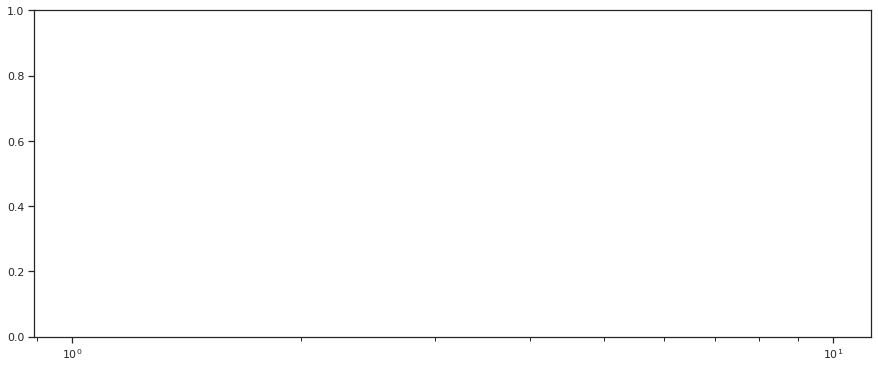

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(15, 6))
ax.set_xscale("log")

# Load the dataset
#joined_desc = sns.load_dataset("joined_desc")

# Plot the orbital period with horizontal boxes
sns.boxplot(x="m_price", y="cluster_id", data=joined_desc,
            whis=[0, 100], width=.6, palette="vlag")

# Add in points to show each observation
sns.stripplot(x="m_price", y="cluster_id", data=joined_desc,
              size=4, color=".3", linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)